<a href="https://colab.research.google.com/github/Mary2agonz/colab-cd24/blob/main/Sprint_M4_MAG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sprint Módulo 4**

Estudiante:

Marilyn Aguilar González


enlace github: https://github.com/Mary2agonz/colab-cd24/blob/main/Sprint_M3_MAG.ipynb

-------------------------------------------------------------------
**Objetivo del proyecto**:

Elaborar inferencias estadísticas a una muestra para la estimación de una población de acuerdo a los requerimientos de análisis.

#Primera parte
* Debe cargar la base y
* eliminar las siguientes variables, Alley, FireplaceQu, PoolQC, Fence, MiscFeature, LotFrontage.
* Luego realice un resumen estadístico con las variables que han quedado en la base.

In [ ]:
#Primero importo las librerias necesarias para el analisis de datos
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

#Cargo el archivo desde el link drive del documento
house_path = "https://drive.google.com/uc?id=1OKeZki1CRLiSVFoslUb8BYRuTGopjzRX"
#Almaceno el archivo en el DataFrame df_house por medio del uso de pandas
df_house = pd.read_csv(house_path)

#Muestro las primeras 10 filas del df
df_house.head(10)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
#Antes de la eliminación de columnas solicitadas, realizo la limpieza de datos faltantes/perdidos
#Para ello realizo el conteo de los valores NaN de mi df
nan_counts = df_house.isna().sum()

#Realizo el filtro de las columnas con valores NaN de mi df
nan_columns = nan_counts[nan_counts > 0]
#Muestro el resultado de columnas con NaN
nan_columns

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [ ]:
#Continuación de limpieza de datos para las variables numericas y categoricas
#Para las variables numericas, utilizo la mediana para reemplazar los nan
num_columns_with_nan = ['MasVnrArea', 'GarageYrBlt']
#Utilizo el bloque for para iterar sobre las columnas de valores faltantes
for column in num_columns_with_nan:
    #Utilizo el método fillna() para rellenar los valores NaN cpor la mediana de la columna correspondiente
    #Con inplace=True aseguramos que los cambios se realicen sobre el df original (df_house)
    df_house[column].fillna(df_house[column].median(), inplace=True)

#Para las variables categoricas, reemplazo los NaN por 'Desconocido'
cat_columns_with_nan = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                        'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType',
                        'GarageFinish', 'GarageQual', 'GarageCond']
#Utilizo el bloque for para iterar sobre las columnas de variables categóricas con valores NaN
for column in cat_columns_with_nan:
  #Igual que anteriormente, utilizo fillna() e inplace=True para reemplazar los valores faltantes por desconocido y realice los cambios sober el df original
  df_house[column].fillna('Desconocido', inplace=True)

#Revisamos los valores NaN luego de los reemplazos
nan_counts = df_house.isna().sum()
#Realizo el filtro sobre las columnas con valores NaN
nan_columns = nan_counts[nan_counts > 0]
#Muestro las columnas con valores NaN finales
nan_columns

LotFrontage     259
Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

Justamente estas columnas son las que se indican en el ejercicio que deben ser eliminadas

In [ ]:
#Muestro las primeras 50 filas del df
#df_house.head(50)

In [ ]:
#Eliminación de las columnas solicitadas por el ejercicio
columnas_eliminar = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature', 'LotFrontage']
#Utilizo el método drop() para realizar la eliminación de las columnas_eliminar
df_house.drop(columns=columnas_eliminar, inplace=True)
#Finalmente se imrpime el mensaje de éxito de eliminación y después la información del df actualizado
print("Columnas eliminadas")
df_house.info()


Columnas eliminadas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   i

In [ ]:
#Resumen estadistico de las variables numericas
#Utilizo el método describe() para calcular las estadisticas descriptivas de cada columna del df
summary_statistics = df_house.describe()
#Utilizo este comando de pandas para mostrar todas las columnas (ya que habitualmente muestra algunas y las demás entre "...")
pd.set_option('display.max_columns', None)
#Luego muestro una vista previa de estas estadisticas mediante el uso del método head()
#summary_statistics.head()
#Imprimo el resumen estadístico
display(summary_statistics)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Entre los resultados más destacables del resumen estadístico, es importante tener en cuenta que la mediana y los quartiles (o percentiles) nos darán una idea del rango de valores para variable (columna). Asimismo los valores máximos y mínimos nos darán una idea de la gama completa de valores que se incluyen para cada variable estudiada.

Por ejemplo, para algunas variables como OverallQual y YealBuilt, los valores como tal pueden ser decisivos para ciertos compradores que busquen casas no tan viejas y con mejor calidad, ya que en el caso de OverallQual,valores más altos nos indicarán casas de mejor calidad, y lo mismo para el año de construcción, valores mayores nos inidicaran casas más nuevas. Este ejemplo toma en cuenta solo algunos de los aspectos importantes que se podrían considerar al momento de comprar una casa. Por lo tanto, este resumen estadístico puede permitir una decisión basada en datos, dependiendo de las preferencias y detalles que quien quiera comprar considere.

Por otro lado, en terminos de dispersión de los datos, en este resumen estadístico podemos observar la desviación estándar como parámetro indicador. Valores altos nos indican mayor desviación y viceversa. Para nuestro caso, nos interesa conocer las variables con desviación estándar bajo, pues nos indica menor variabilidad de los datos. En comparación con otras, las variables con menor desviación estándar de la base de datos son:
* **LowQualFinSF (Superficie de baja calidad en pies cuadrados)**
* **BsmtHalfBath (Cantidad de baños medios en el sótano)**
* **3SsnPorch (Área de porche de tres estaciones en pies cuadrados)**

Sumado a lo anterior, para analizar la distribución de los datos de cada variable podemos utilizar la diferencia entre los percentiles 25 y 75, y donde sea más pequeña podemos inferir que la distribución es más uniforme. Algunas de las variables del conjunto de datos que cumplen con esta condición son:
* **OverallCond (Condición general)**
* **BsmtHalfBath (Cantidad de baños medios en el sótano)**
* **BedroomAbvGr (Número de dormitorios sobre el nivel del suelo)**

Por último, cabe destacar que BsmtHalfBath (Cantidad de baños medios en el sótano) presenta baja desviación estándar y pequeña diferencia entre sus percentiles 25 y 75. Esto peude significar que la mayoría de las casas de la base de datos tienen una cantidad similar de baños medios en el sótano.

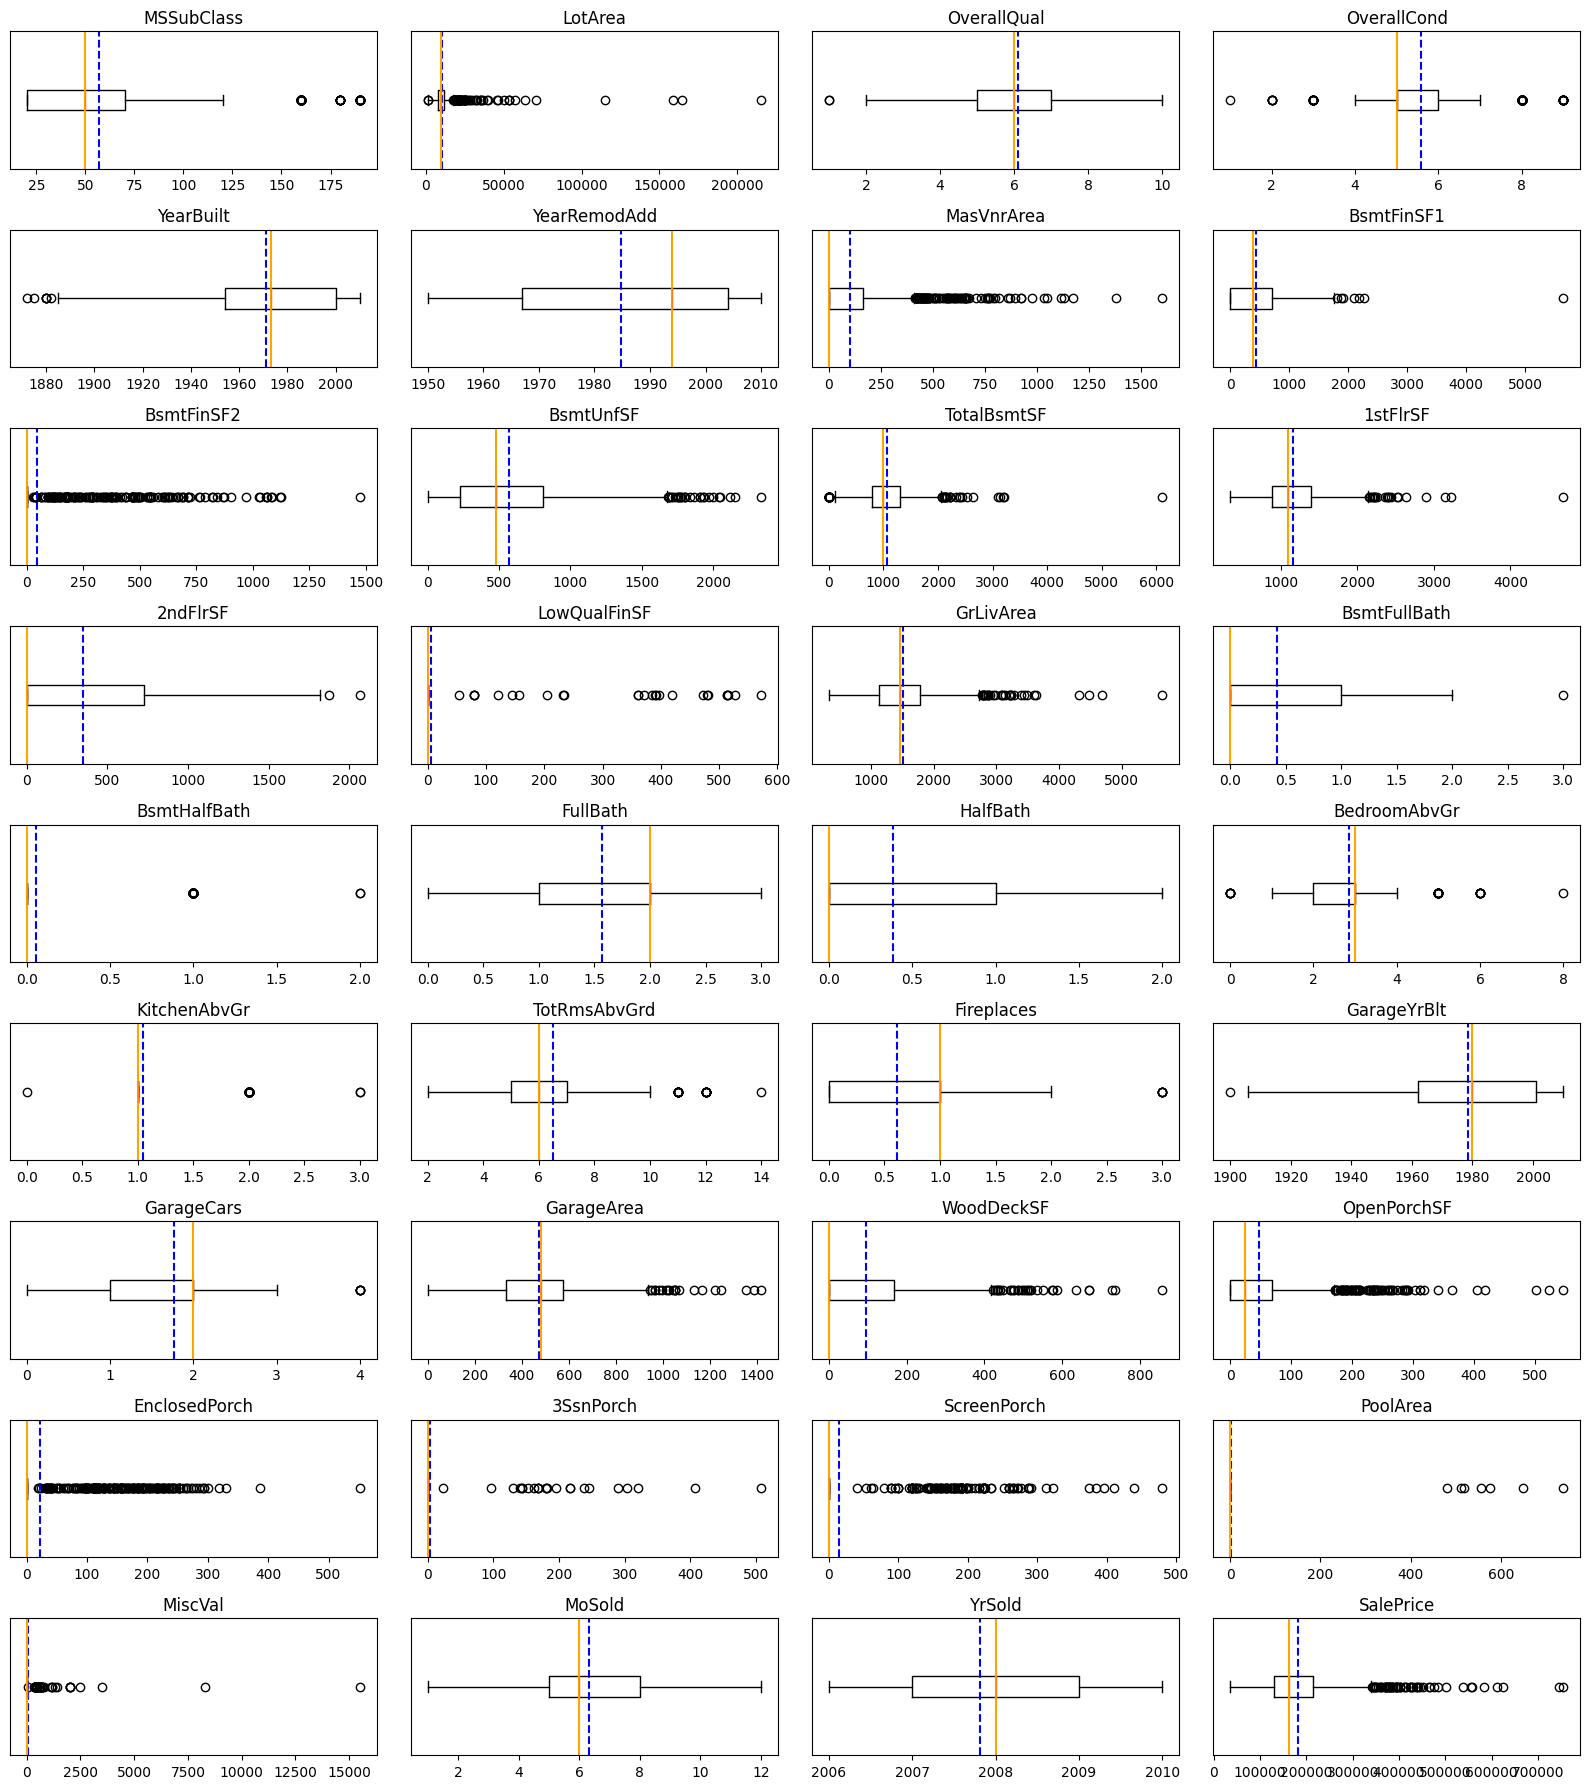

In [ ]:
#Creo una ventana para generar multiples boxplot para cada columna y así utilizarlo en el informe
#Primero selecciono solo las columnas numéricas (ya que intenté aplicarlo normal sin crear esta variable y me dio error)
#Para ello creo la variable que contiene todas las columnas del df_house excluyendo 'Id'
df_house_select= df_house.select_dtypes(include=['number']).drop(columns='Id')

#Extraigo el nombre de las columnas numéricas
variables = df_house_select.columns

# Crear subplots en una cuadrícula de 9 filas por 4 columnas
fig, axs = plt.subplots(9, 4, figsize=(16, 18))

#Utilizo la matriz flatten() para pasar de la matriz a una matriz unidimencional y facilitar el acceso a cada subplot
axs = axs.flatten()

#Creo el bucle for para iterar sobre las variables y crear los boxplots
for ax, variable in zip(axs, variables):
    ax.boxplot(df_house[variable], vert=False)
    ax.set_title(f'{variable}')
    ax.set_yticks([])  # Oculta el eje y

    #Agrego las líneas para la media y la mediana con colores que convinen para el informe
    ax.axvline(df_house[variable].mean(), color='blue', linestyle='--', label='Media')
    ax.axvline(df_house[variable].median(), color='orange', linestyle='-', label='Mediana')

#Ajusto el espacio entre subplots e imprimo el resultado
plt.tight_layout()
plt.show()


Tal como se muestra en la figura y se describe estadísticamente en la tabla y bloque de texto prescedente, la distribución de los datos para las variables numéricas asociadas a las 1460 observaciones de la base de datos, nos entregan una idea general de nuestro conjunto de datos y de la gama de valores de cada una de las variables consideradas.

En particular, en la ventana gráfica con los boxplot podemos observar además de lo que ya se ha comentado con anterioridad (quartiles y dispersión asociada a desviación estándar, las variables que tienen una media similar a la mediana. Esto indica una distribución de los datos más equilibrada, pues no están sesgadas hacia alguno de los extremos del rango de valores. En el contexto estadístico, se entiende que cumpliendose esta condición la distribución de los datos es simétrica, con una cantidad similar de valores sobre y debajo del valor central (50%).

Al respecto, las variables con distribución más uniforme que muestran esta condición en la base de datos estudiada, pese a la presencia de outliers, son:
* OverallQual (Calidad general)
* YearBuilt (Año de construcción)
* BsmtFullBath (Cantidad de baños completos en el sótano)

Por otra parte, el hecho que la media y la mediana sean similares nos permite utilizar la media como un parámetro confiable que representa de forma más precisa del valor central de los datos.

In [ ]:
#Aunque el ejercicio no lo solicita me parece complementario añadir este segmento de código
#Para analizar los valores atípicos (outliers) de nuestra df aplicamos el IQR
#Primero selecciono solo las columnas numéricas (ya que intenté aplicarlo normal sin crear esta variable y me dio error)
dfn_house= df_house.select_dtypes(include=['number'])
#Calculo el rango intercuartíl (IQR) para cada columna
Q1 = dfn_house.quantile(0.25)
Q3 = dfn_house.quantile(0.75)
IQR = Q3 - Q1

#Imrpimo el resultado
print("Rango intercuartíl (IQR) para cada columna:")
display(IQR)

Rango intercuartíl (IQR) para cada columna:


Id                 729.50
MSSubClass          50.00
LotArea           4048.00
OverallQual          2.00
OverallCond          1.00
YearBuilt           46.00
YearRemodAdd        37.00
MasVnrArea         164.25
BsmtFinSF1         712.25
BsmtFinSF2           0.00
BsmtUnfSF          585.00
TotalBsmtSF        502.50
1stFlrSF           509.25
2ndFlrSF           728.00
LowQualFinSF         0.00
GrLivArea          647.25
BsmtFullBath         1.00
BsmtHalfBath         0.00
FullBath             1.00
HalfBath             1.00
BedroomAbvGr         1.00
KitchenAbvGr         0.00
TotRmsAbvGrd         2.00
Fireplaces           1.00
GarageYrBlt         39.00
GarageCars           1.00
GarageArea         241.50
WoodDeckSF         168.00
OpenPorchSF         68.00
EnclosedPorch        0.00
3SsnPorch            0.00
ScreenPorch          0.00
PoolArea             0.00
MiscVal              0.00
MoSold               3.00
YrSold               2.00
SalePrice        84025.00
dtype: float64

A modo de complementar el análisis descriptivo de las variables del df_house realicé la ventana de boxplot comentada anteriormente y el Análisis del Rango Intercuartíl (IQR) de las variables numéricas del DataFrame.

Al respecto, cabe mencionar que evaluar el IQR nos ayuda a entender la dispersión de los datos para cada variables en estudio, y en este contexto, nos permite analizar la variabikidad de las diferentes características de las casas de la base de datos estudiada.

En resumen, un IQR muy alto nos indica mayor variabilidad en los datos de la variable analizada, y viceversa para un IQR más chico.

En particular, las variables con mayor IQR (mayor variabilidad) de nuestra base de datos son:

* **SalePrice (Precio de Venta)**
* **LotArea (Área del Lote)**
* **2ndFlrSF (Área del Segundo Piso)**
* **GrLivArea (Área Habitable sobre el Suelo)**
* **BsmtFinSF1 (Pies Cuadrados Terminados del Sótano Tipo 1)**
* **MasVnrArea (Área de Revestimiento de Piedra o Mampostería)**
* **BsmtUnfSF (Pies Cuadrados sin Terminar del Sótano)**
* **TotalBsmtSF (Área Total del Sótano)**
* **1stFlrSF (Área del Primer Piso)**
* **GarageArea (Área del Garaje)**
* **WoodDeckSF (Área del Deck de Madera)**

En primer lugar, SalePrice es la variable que tiene el > IQR de la base de datos seguido de LotArea, lo que indica una variabilidad significativa en los precios de venta de las casas, con un rango intercuartíl de $84.025 dolares. Esto puede ser importante para los compradores ya que nos indica que la base de datos contiene una amplia variedad de casa a diferentes precios.
Asimismo, las demás variables con mayor variabilidad del conjunto de datos están relacionadas con superficies. Esto indica una variabilidad significativa en esas características dentro del conjunto de datos de las casas evaluadas, loi que puede ser indicativo de diferentes tamaños de lotes, áreas habitables, áreas de almacenamiento y áreas recreativas como garajes y terrazas, lo cual sugiere una amplia diversidad de casas consideradas. El hecho que presenten mayor variabilidad permitirá tener una mayor gama de opciones al momento de evaluar la compra de casa, en términos de espacio y características relacionadas con el área de interés.

Por su parte, las variables con menor IQR (menor variabilidad, IQR=0) de nuestra base de datos son:
* **BsmtFinSF2 (Pies Cuadrados Terminados del Sótano Tipo 2)**
* **LowQualFinSF (Pies Cuadrados de Acabado de Baja Calidad)**
* **BsmtHalfBath (Baños de la Mitad en el Sótano)**
* **KitchenAbvGr (Número de Cocinas por Encima del Suelo)**
* **EnclosedPorch (Área del Porche Cerrado)**
* **3SsnPorch (Área del Porche de Tres Estaciones)**
* **ScreenPorch (Área del Porche con Pantalla)**
* **PoolArea (Área de la Piscina)**
* **MiscVal (Valor Misceláneo)**

El hecho que estas variables muestren bajo IQR (IQR=0) indica una falta de variabilidad significativa en los datos de estas variables, y sugiere que estas características podrían no ser tan influyentes en la decisión de compra. Por ejemplo, en el caso de "BsmtFinSF2" y "LowQualFinSF", la ausencia de variación sugiere que la mayoría de las propiedades en la base de datos analizada carecen de estas características específicas (áreas terminadas del sotano tipo 2 y áreas de acbao de baja calidad). De igual forma, las demás variables con IQR=0("BsmtHalfBath", "KitchenAbvGr", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea" y "MiscVal"), también indican que la mayoría de casas consideradas en el conjunto de datos probablemente carece de las áreas consideradas por estas variables. Esto puede ser útil para quienes buscan casas con o sin estas características específicas.







In [ ]:
#También añadí este segmento para alimentar mi análisis de datos
#Correlación de Pearson
#Selecciono solo las columnas numéricas para analizar la correlación
numeric_columns = df_house.select_dtypes(include=['float64', 'int64'])

#Realizo el calculo de la matriz la correlación de Pearson
correlation_matrix = numeric_columns.corr(method='pearson')

#Imprimo la matriz de correlación con display para que sea más interactivo
display(correlation_matrix)

#Realizo un filtro para valores significativos > 0.75 o menores que -0.75
high_correlation = correlation_matrix[(correlation_matrix > 0.75) | (correlation_matrix < -0.75)]
#Utilizo este comando de pandas para mostrar todas las columnas (ya que habitualmente muestra algunas y las demás entre "...")
pd.set_option('display.max_columns', None)

#Imprimo la matriz de correlación
display(correlation_matrix)

#Imprimo el resultado
display(high_correlation)


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,-0.000122,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.051071,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,-0.000122,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.081396,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotArea,-0.033226,-0.139781,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.025865,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.514231,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.306276,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.777182,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.616444,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.051071,0.023573,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.244444,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.005024,-0.069836,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.148782,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.005968,-0.065649,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,-0.087684,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSSubClass,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
LotArea,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OverallQual,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.790982
OverallCond,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearBuilt,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.777182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
YearRemodAdd,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MasVnrArea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


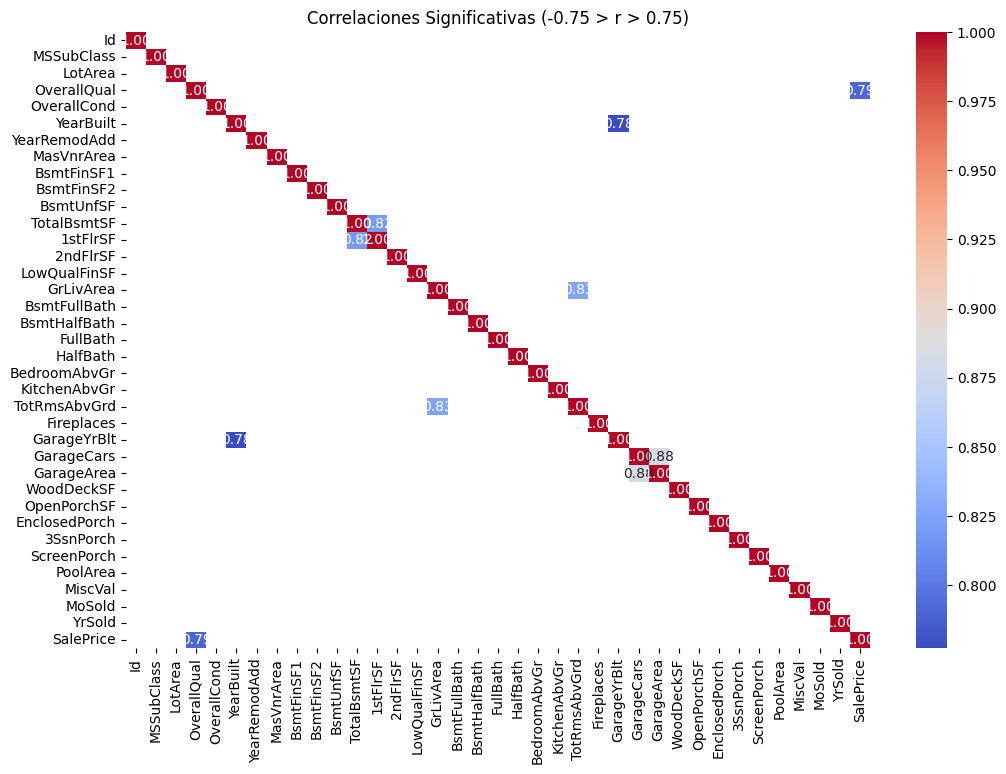

In [ ]:
#Creo un mapa de calor para visualizar más facilmente la matriz de correlación con las relaciones significativas filtradas
plt.figure(figsize=(12, 8))
sns.heatmap(high_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones Significativas (-0.75 > r > 0.75)')
plt.show()

Con este resultado podemos observar las correlaciones que son mayores que 0.75 o menores que -0.75, las cuales pueden considerarse significativas.
Dentro de las correlaciones filtradas no se encontraron correlaciones significativas negativas (<-0.75), y por el contrario se observan 5 correlaciones positivas mayores a 0.75, estas son:


Variables con correlaciones con fuerte relación lineal (r>0.75). Es decir, cuando una aumenta la otra también, y viceversa.:
* SalePrice / OverallQual: 0.790982
* YearBuilt	/ GarageYrBlt: 0.777182
* 1stFlrSF	/ TotalBsmtSF: 0.81953
* GrLivArea / TotRmsAbvGrd: 0.825489
* GarageCars / GarageArea: 0.882475

En particular, esto indica que hay una correlación significativa entre el precio de venta de la casa y la calidad general de la casa (r=0.790982). Esto sugiere que, a mejor calidad de la materialidad de la casa, el precio de venta aumentará. Por lo tanto, es importante tener en cuenta esta relación al observar el valor de la propiedad.

La correlación significativa (r=0.777182) entre el año de construcción del vivienda y del garage, sugiere que en la mayoría de los casos los garage se construyen al mismo tiempo o cerca del tiempo de construcción de la vivienda. Esto puede ser interesante a tener en cuenta para futuras renovaciones que requiera la vivienda y/o garage dado el tiempo de contrucción (por ejemplo, para mantención de tuberías, techumbre, etc).

Por su parte, la correlación significativa (r=0.81953) entre el área del primer piso y el área total del sótano sugiere que las casas con un sótano más grande tendrán también un área del primer piso más grande. Este es un dato interesante con respecto a la distribución de la casa, porque es posible inferir que un tamaño mayor de sótano también podría significar mayor superficie habitable para el primer piso.

En cuanto a la correlación significativa (r=0.825489) entre el área total habitable sobre el nivel del suelo y el número total de habitaciones sobre el nivel del suelo indica que a mayor superficie de área habitable, más habitacioens hay en la vivienda. Esto puede ser relevante para una persona que busca una casa con más o menos habitaciones.

Por último, la correlación significativa (r=0.882475) entre la capacidad del garage en número de autos y el tamaño del garaje en pies cuadrados indican que generalmente los garage con más tamaño tienen más capacidad para más autos. Esto puede ser importante para quien quiere más espacio en el garage.

#Segunda parte
Luego que conozca las características de la base de trabajo, usted ha sido
contratado para realizar una recomendación de oferta para el adulto joven recién egresado de la universidad que está en búsqueda de casa, para esto
debe formar parte de su análisis lo siguiente:
- Variables que distribuyen normal (en caso contrario, sugiere otra)
- Si le parece adecuado, puede realizar un remuestreo si la base le
parece muy grande (este apartado no lleva puntaje, pero se agregaron
3 puntos).
- Construya Intervalos de confianza
- Testee hipótesis que apoyen/no apoyen las ofertas de compra.

Espera que hagan comentarios de los resultados que obtenga y no solo números. Agregue gráficos que complementen su estudio (al menos unos tres gráficos). Debe entregar un pdf con sus conclusiones y un código .py incluya los códigos usados. Agregue el nombre de ambos integrantes en una portada, invente un título que se adecue al contexto.


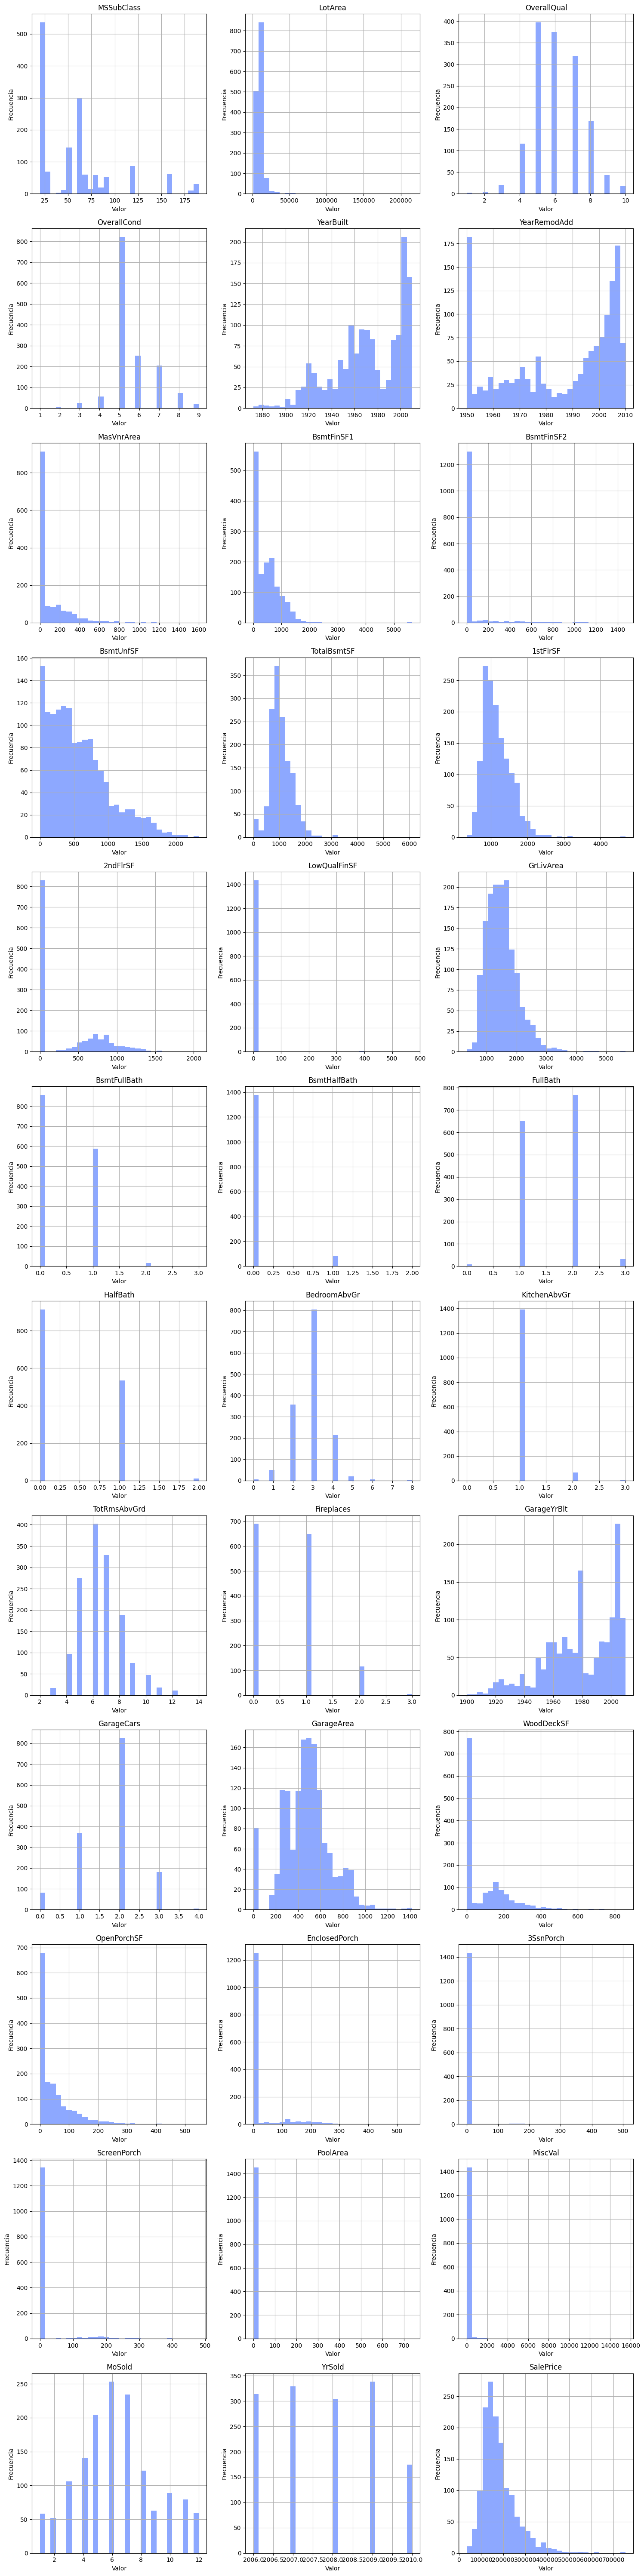

In [18]:
#Distribución de las variables
#Para analizar la distribución de las variables utilizaré histogramas
#Para ello selecciono las columnas numéricas aptas para realizar los histogramas (excluyendo el id)
numeric_columns = df_house.drop(columns=['Id']).select_dtypes(include=['int64', 'float64']).columns

#Realizo la configuración del marco gráficos ya que imprimiré multiples plots
num_plots = len(numeric_columns)
num_rows = num_plots // 3 + (num_plots % 3 > 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))
axes = axes.flatten()

#Luego aplico un bucle for para iterar sobre cada variables numérica
for i, col in enumerate(numeric_columns):
    ax = axes[i]
    df_house[col].hist(ax=ax, color='#8DA8FF', bins=30)
    ax.set_title(col)
    ax.set_ylabel('Frecuencia')
    ax.set_xlabel('Valor')

#Finalmente ajusto el marco de gráfico y lo muestro
plt.tight_layout()
plt.show()


Tomando en consideración la distribución de las variables expuesta en los histogramas, para realizar la recomendación al joven recién egresado de la universidad en búsqueda de casa, se seleccionaron aquellas que presentan una distribución normal y, al mismo tiempo, no están altamente correlacionadas entre sí para evitar redundancias en la información proporcionada y el análisis final. Es por ello que se han elegido las variables **TotalBsmtSF, GrLivArea y SalePrice**.

Aunque otras variables como TotalRmsAbvGrd, 1stFlrSF y OverallQual también mostraron una distribución normal, su fuerte correlación con las variables seleccionadas, según el análisis de correlación previo, podría ser redubndante incluirlas para el analisis final. Por ejemplo, la alta correlación entre SalePrice y OverallQual (*r* = 0,79), TotalBsmtSF y 1stFlrSF (*r* = 0,82), y GrLivArea y TotRmsAbvGrd (*r* = 0,83) sugiere que estas variables proporcionan información similar sobre las casas, por lo que seleccionar solo una de ellas es suficiente para tomar decisiones informadas en la búsqueda de una casa, entendiendo obviamente que existe una relación significativa entre estas.

Por otro lado, pese a que MoSold (Mes en que se vendió la casa) presenta una distribución normal en sus datos, esta variable no se consideró como una variable relevante para la toma de decisión sobre la compra de la casa. Asimismo, las variables relacionados a años también se excluyeron para proseguir con el analisis de recomendación principalmente porque no se encontró ninguna correlación significativa entre los años de ciertas características como construcción de la vivienda por ejemplo, con alguna de las características esenciales como calidad general, áreas, precio, entre otras.

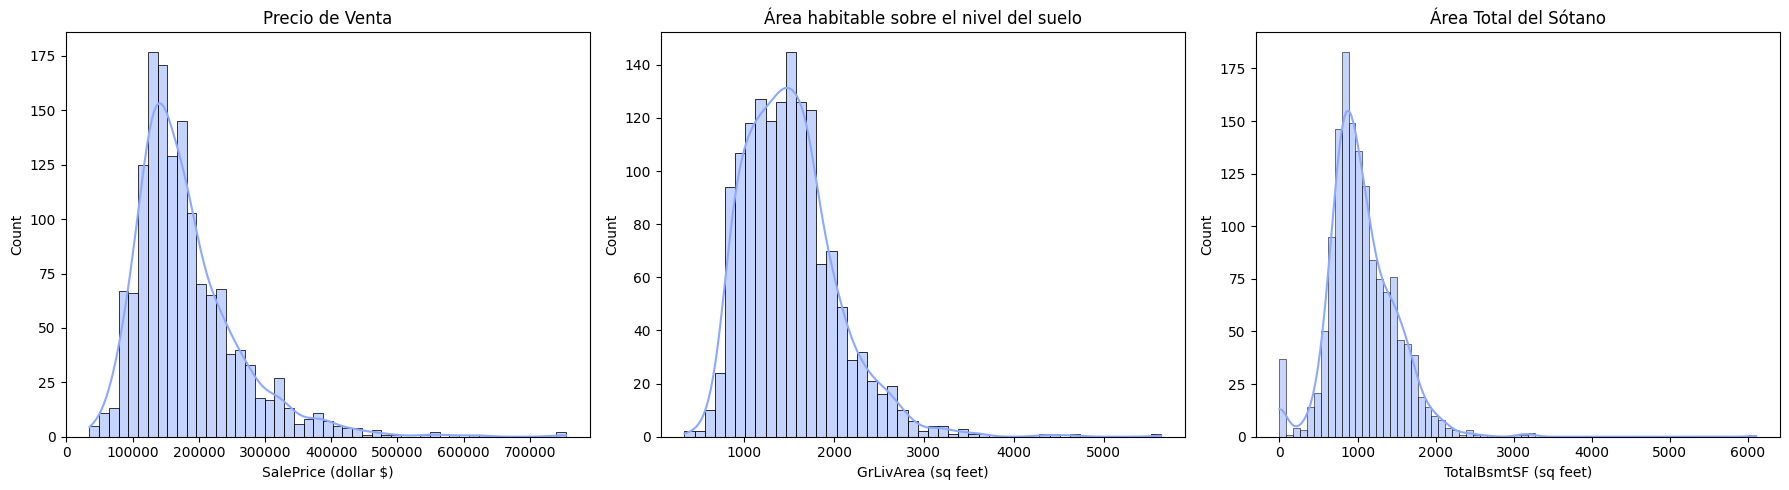

In [25]:
#Gráfico de barras para TotalBsmtSF, SalePrice y GrLivArea en una sola salida
#Priemro defino la lista de variables y los títulos que utilizaré para los gráficos
variables = ['SalePrice', 'GrLivArea', 'TotalBsmtSF']
titulos = ['Precio de Venta', 'Área habitable sobre el nivel del suelo', 'Área Total del Sótano']

#Configuro la ventana del gráfico y las dimensiones para los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Al igual que los gráficos precedentes en este colab, utilizo el bucle for para iterar osbre cada variable y título considerado
#Utilizo la función enumerate() que devuelve el indice y valor de cada elemento de la lista
for i, variable in enumerate(variables):
    #utilizo seaborn para crear un histograma por variable y con ax=axes[i] le indico en el eje que se dibujarán los plots
    sns.histplot(df_house[variable], kde=True, color='#8DA8FF', ax=axes[i])
    #tanto para el título como eje x utilizo el argumento axes[i] para que seleccione los títulos y variables correspondientes al mismo indice en el que se está iterando
    axes[i].set_title(titulos[i])
    #Incluí la condición if-esle para que en el caso de variable SalePrice incluya dollar en vez de sq feet
    axes[i].set_xlabel(f'{variables[i]} (sq feet)' if variable != 'SalePrice' else f'{variables[i]} (dollar $)')

#con tight_layout() los gráficos se ajustan automaticamente a la ventana de visualización sin sobreponerse
plt.tight_layout()
#Finalmente imprimo los gráficos
plt.show()


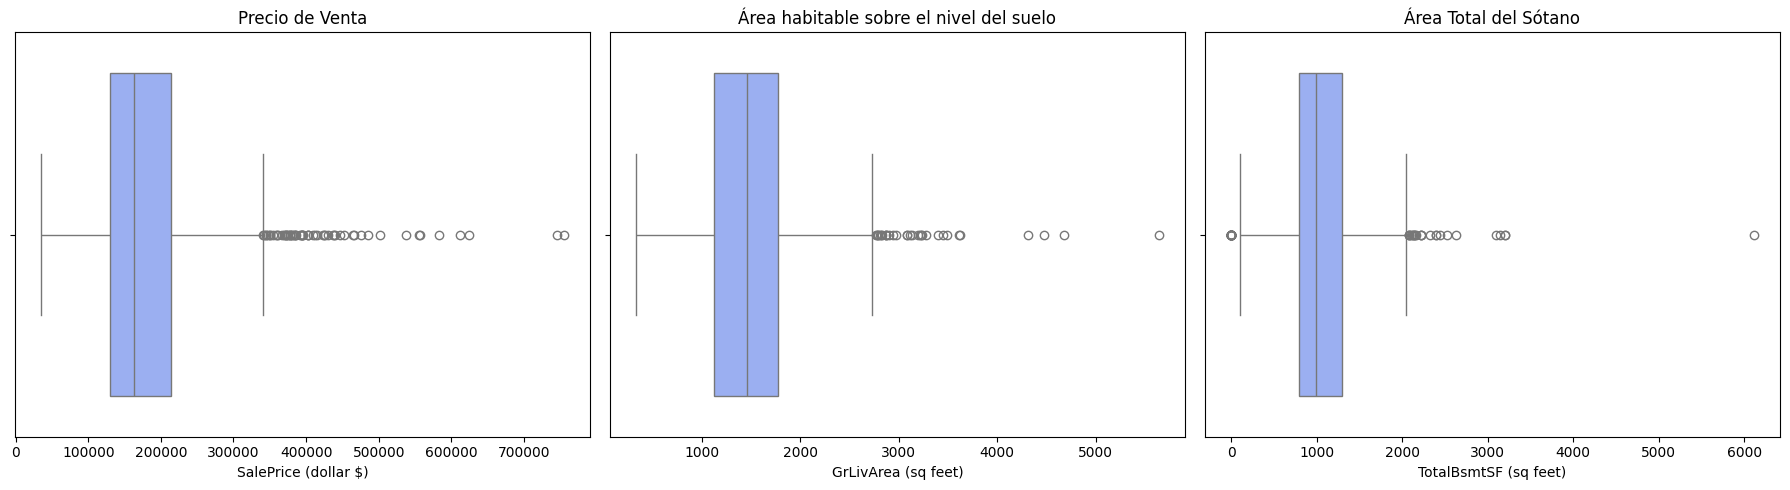

In [31]:
"""#Gráfico de barras para TotalBsmtSF, SalePrice y GrLivArea en una sola salida
#Priemro defino la lista de variables y los títulos que utilizaré para los gráficos
variables = ['SalePrice', 'GrLivArea', 'TotalBsmtSF']
titulos = ['Precio de Venta', 'Área habitable sobre el nivel del suelo', 'Área Total del Sótano']
"""
#Reutilicé el código utilizado para los gráficos anteriores pero cambiandole a boxplot
#Configuro la ventana del gráfico y las dimensiones para los subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

#Al igual que los gráficos precedentes en este colab, utilizo el bucle for para iterar osbre cada variable y título considerado
#Utilizo la función enumerate() que devuelve el indice y valor de cada elemento de la lista
for i, variable in enumerate(variables):
    #utilizo seaborn para crear un histograma por variable y con ax=axes[i] le indico en el eje que se dibujarán los plots
    sns.boxplot(x=df_house[variable], color='#8DA8FF', ax=axes[i])
    #tanto para el título como eje x utilizo el argumento axes[i] para que seleccione los títulos y variables correspondientes al mismo indice en el que se está iterando
    axes[i].set_title(titulos[i])
    #Incluí la condición if-esle para que en el caso de variable SalePrice incluya dollar en vez de sq feet
    axes[i].set_xlabel(f'{variables[i]} (sq feet)' if variable != 'SalePrice' else f'{variables[i]} (dollar $)')

#con tight_layout() los gráficos se ajustan automaticamente a la ventana de visualización sin sobreponerse
plt.tight_layout()
#Finalmente imprimo los gráficos
plt.show()



In [32]:
#Mismos gráficos pero sin outliers
#Defino la funcion para eliminar outliers basados en el rango intercualtíl (IQR)
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

#Elimino los outliers de las tres variables
df_cleaned = remove_outliers(df_house, 'TotalBsmtSF')

#Estos dos códigos ya incorporan df_house, por eso los elimina desde df_cleaned
df_cleaned = remove_outliers(df_cleaned, 'SalePrice')
df_cleaned = remove_outliers(df_cleaned, 'GrLivArea')

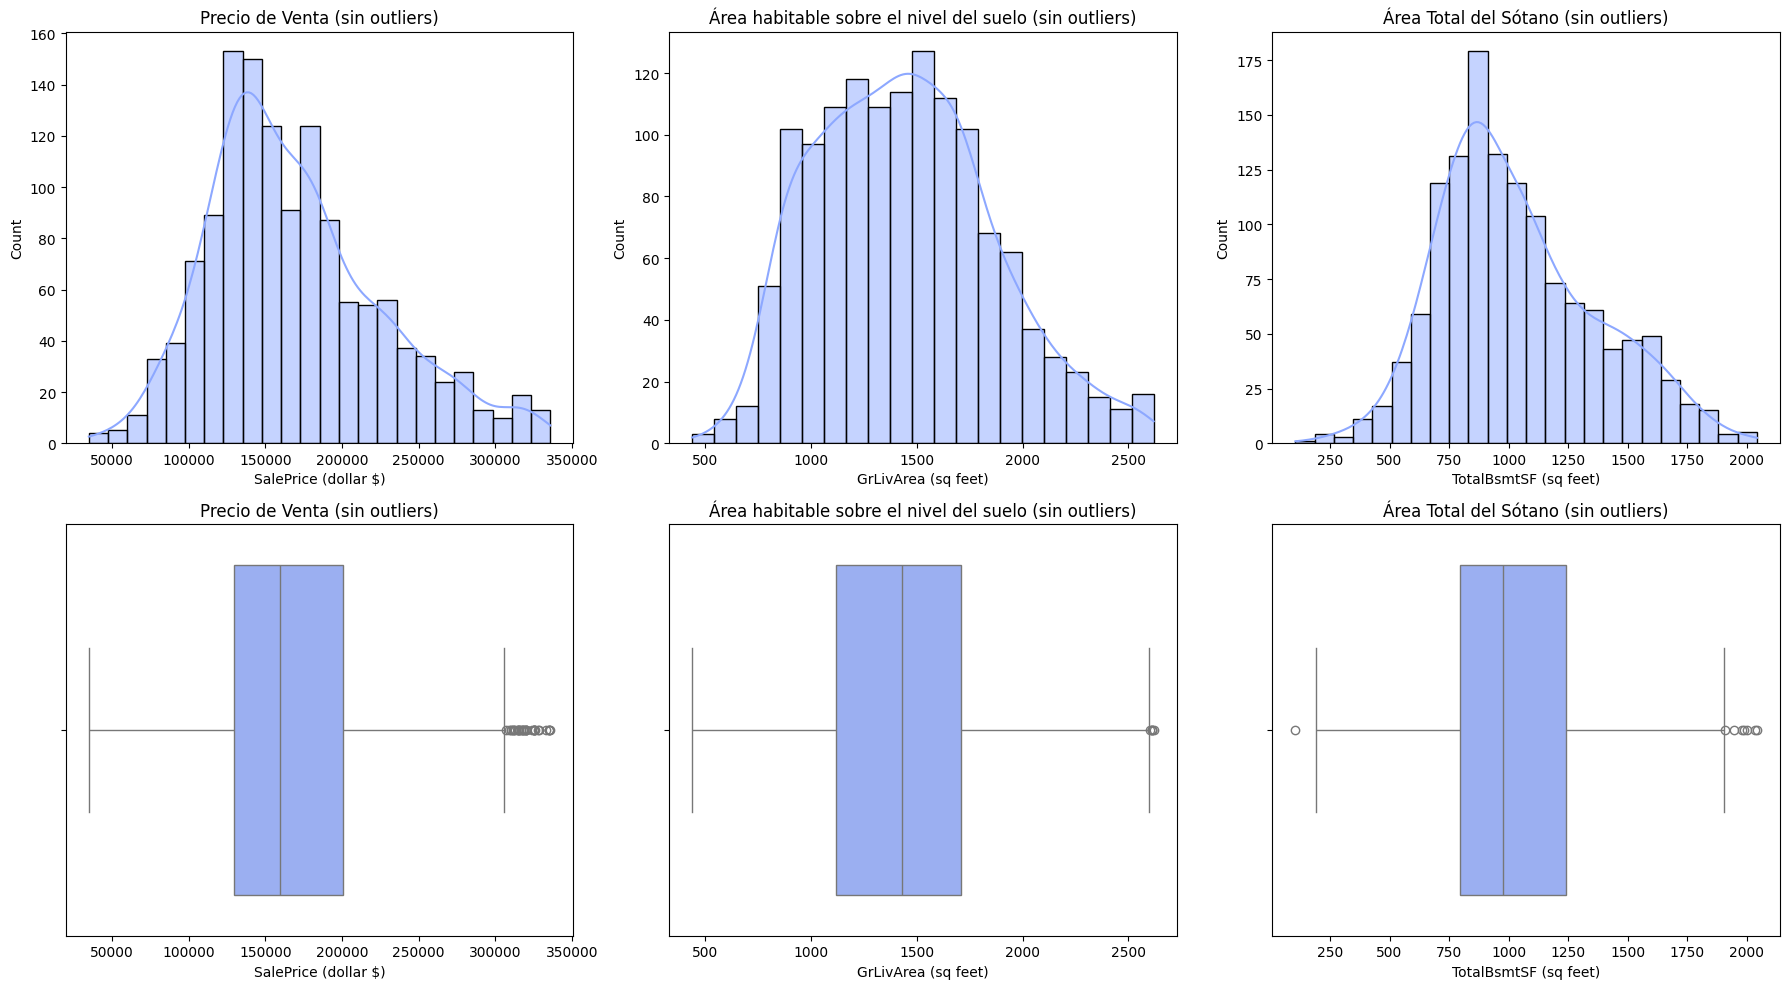

In [37]:
#Reutilicé el código utilizado para los gráficos anteriores
#Configuro la ventana del gráfico y las dimensiones para los subplots
fig, axes = plt.subplots(2, len(variables), figsize=(18, 10))

#Al igual que los gráficos precedentes en este colab, utilizo el bucle for para iterar osbre cada variable y título considerado
#Primero los histogramas sin outliers
for i, variable in enumerate(variables):
    sns.histplot(df_cleaned[variable], kde=True, color='#8DA8FF', ax=axes[0, i])
    axes[0, i].set_title(f'{titulos[i]} (sin outliers)')
    axes[0, i].set_xlabel(f'{variables[i]} (sq feet)' if variable != 'SalePrice' else f'{variables[i]} (dollar $)')

#Luego los boxplots sin outliers
for i, variable in enumerate(variables):
    sns.boxplot(x=df_cleaned[variable], ax=axes[1, i], color='#8DA8FF')
    axes[1, i].set_title(f'{titulos[i]} (sin outliers)')
    axes[1, i].set_xlabel(f'{variables[i]} (sq feet)' if variable != 'SalePrice' else f'{variables[i]} (dollar $)')

#con tight_layout() los gráficos se ajustan automaticamente a la ventana de visualización sin sobreponerse
plt.tight_layout()
#Finalmente imprimo los gráficos
plt.show()

In [38]:
#Último requerimiento de código del ejercicio:
#Construya Intervalos de confianza y testee hipótesis que apoyen/no apoyen las ofertas de compra (en este caso la variable SalePrice)

#Importo las librerias necesarias (van comentadas por que ya se llamaron al inicio de este colab)
#from scipy import stats
#import numpy as np

#Defino el nivel de confianza
confidence_level = 0.95

#Calculo el intervalo de confianza para el precio de venta promedio
sale_price_mean = df_cleaned['SalePrice'].mean()
sale_price_std = df_cleaned['SalePrice'].std()
n = len(df_cleaned['SalePrice'])
z_critical = stats.norm.ppf((1 + confidence_level) / 2)

#Calculo el margen de error
margin_error = z_critical * (sale_price_std / np.sqrt(n))

#Calculo el intervalo de confianza
confidence_interval = (sale_price_mean - margin_error, sale_price_mean + margin_error)

#Defino el umbral de accesibilidad en terminos monetarios (hipotético)
#"Precio máximo que el comprador está dispuesto a pagar por una casa"
accessibility_threshold = 150000

#Realizar la prueba de hipótesis
#H0: mu = accessibility_threshold
#H1: mu != accessibility_threshold
t_stat, p_value = stats.ttest_1samp(df_cleaned['SalePrice'], accessibility_threshold)

#Imprimo los resultados
print(f"Intervalo de confianza: {confidence_interval}")
print(f"Valor t: {t_stat}")
print(f"Valor p: {p_value}")


Intervalo de confianza: (166168.6765449053, 172273.17390826694)
Valor t: 12.34248094519635
Valor p: 3.323817673409953e-33



De acuerdo con los resultados obtenidos, el intervalo de confianza para el precio de venta promedio se encuentra entre $166.169 y $172.273 dólares, con un nivel de confianza del 95%. Esto significa que podemos estar seguros al 95% de que el verdadero valor promedio del precio de venta de las casas en el mercado inmobiliario está contenido dentro de este rango. Esto puede ser útil para los compradores potenciales, ya que les permite comprender a modo general la expectativa financiera de la oferta inmobiliaria.

Por otro lado, el valor t obtenido es de 12.34, mientras que el valor p es extremadamente pequeño, (3.32 * 10^-33). Esto indica que hay una diferencia significativa entre el precio de venta promedio observado y el umbral de accesibilidad hipotético de $150.000 dólares.

Esto sugiere que el valor hipotético está lejos de la media muestral para SalePrice. Además, el hecho que el valor p fuera esencialmente cero nos lleva a rechazar la hipótesis nula, pues nos indica que la probabilidad de observar los datos muestrales si la hipótesis nula (precio de venta promedio igual a $150,000) fuera cierta es extremadamente baja.

En resumen, estos resultados sugieren que el precio de venta promedio de las casas en estudio supera significativamente el umbral de accesibilidad hipotético de $150.000 dólares, lo que podría impactar significativamente en la decisión del comprador en términos de presupuesto y expectativas financieras.